<a href="https://colab.research.google.com/github/PedroDS4/Modelagem_e_Controle_Motor_CC/blob/main/Simulacao_Motor_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Modelagem do Motor CC**

A equação diferencial que modela a parte elétrica do motor CC no circuito de armadura é dada por

$$
v_a(t) = R_a i_a(t) + L_a \frac{d}{dt}i_a(t) +  E_a(t)
$$

e para o circuito de campo, temos

$$
v_f(t) = R_f i_f + L_f \frac{d}{dt}i_f(t)
$$

a passagem da corrente pelo indutor gera um campo magnético, que ao interagir com a corrente do circuito de armadura, juntos produzem uma força magnética, dada por

$$
\mathbf{F_b}(t) = i(t)\mathbf{L} \ \text{x} \  \mathbf{B}(t)
$$

cujo módulo é dado por

$$
F_b(t) = i(t)LB(t)
$$


Tendo força sobra as bobinas, logo é exercido um torque sobre o centro das bobinas, fazendo o movimento de rotação.

Para o motor CC de imã permanente, o fluxo magnético é constante e gerado por um imã.

Com isso em mãos podemos agora calcular a força eletromotriz induzida pela variação de fluxo magnético no circuito de campo, a qual é dada por

$$
E_a(t) = -N \frac{d}{dt}\phi_f(t)
$$

onde

$$
\phi_f(t) = \int_{S} \mathbf{B} \cdot \mathbf{dA} = \int_{S} B cos(\theta) dA
$$

Assim a tensão induzida é dada por

$$
E_a(t) = -N \frac{d}{dt} B \int_{S} cos(\theta) dA = N B A \omega sen(\omega t) = k_E \omega(t)
$$

Agora para a parte mecânica do motor, temos as seguintes equações, começando pela segunda lei de euler

$$
\tau_{em}(t) - \tau_L = J_{eq}\frac{d}{dt} \omega(t)
$$

e a força eletromagnética é dada por

$$
\tau_{em}(t) = r F_B(t) sen(\alpha)
$$

considerando que $\alpha = 90^o$, temos

$$
\tau_{em}(t) = r F_B(t)
$$

e a força magnética é gerada pela corrente de armadura como

$$
F_B(t) = i_a(t)LB
$$

então a relação entre o torque eletromecânico e a corrente de armadura é

$$
\tau_{em}(t) = rLB i_a(t) = k_T i_a(t)
$$

agora juntando as expressões anteriores, ainda temos que

$$
E_a(t) = N B A \omega sen(\omega t) = k_E \omega(t)
$$

Podemos entãor esolver essa equação utilizando o método de euler, assim:

$$
\begin{cases}
\frac{d}{dt} i_a(t) = \frac{1}{L_a} ( v_a(t) - R_a i_a(t)) - E_a(t) ) \\
\frac{d}{dt} \omega(t) = \frac{1}{J_{eq}} ( \tau_{em}(t) - \tau_L ) \\
E_a(t) = k_E \omega(t)\\
\tau_{em}(t) = k_T i_a(t)
\end{cases}
$$

Abaixo será desenvolvida uma simulação em python com as equações do motor.    


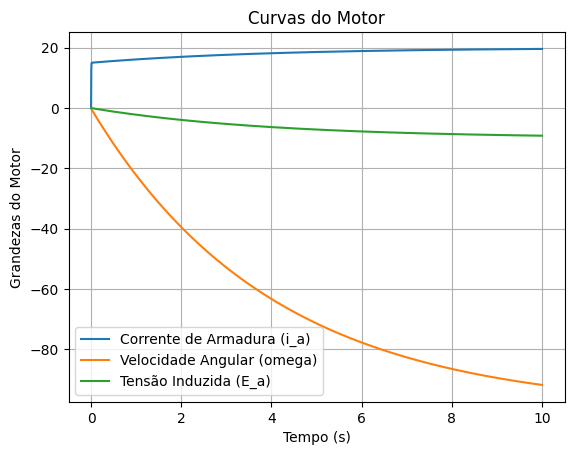

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Parâmetros do motor
L_a = 5.2e-3
R_a = 2
J_eq = 0.02
V_a = 30
kE = 0.1
kT = 0.1
T_L = 2





#Parâmetros da simulação
dt = 1e-5
t = np.arange(0,10,dt)

N = len(t)
i_a = np.zeros(N)
omega = np.zeros(N)
E_a = np.zeros(N)

i_a[0] = 0
omega[0] = 0
E_a[0] = 0



for i in range(N-1):
  i_a[i+1] = i_a[i] + (dt/L_a)*(V_a - R_a*i_a[i] - kE*omega[i])
  omega[i+1] = omega[i] + (dt/J_eq)*(kT*i_a[i] - T_L)
  E_a[i+1] = kE*omega[i]



plt.plot(t,i_a, label='Corrente de Armadura (i_a)') # Adicionando labels para a legenda
plt.plot(t,omega, label='Velocidade Angular (omega)') # Adicionando labels para a legenda
plt.plot(t,E_a, label='Tensão Induzida (E_a)') # Adicionando labels para a legenda
plt.xlabel('Tempo (s)')
plt.ylabel('Grandezas do Motor')
plt.title('Curvas do Motor')
plt.legend() # Adicionando legenda
plt.grid(True) # Adicionando grid para melhor visualização
plt.show()

##**Controle de Velocidade em Regime Permanente**
Em regime permanente, todas as variações deixam de importar, assim, as equações ficam muito mais simples, como por exemplo a equação do circuito de armadura se torna

$$
V_a - R_a i_a = E_a = k_E \omega_m
$$

e a equação mecânica

$$
T_em(t) = T_L = k_T i_a
$$

então temos

$$
\omega_m = \frac{V_a}{k_E} - \frac{R_a}{k_E k_T} T_L
$$

as constantes são dadas por

$$
k_E = NBA
$$

e

$$
k_T = NrLA = NBA
$$

assim

$$
\omega_m = \frac{V_a}{k_E} - \frac{R_a}{k_E^2} T_L = K_1 V_a - K_2 T_L
$$

esse é um controle em regime permanente, onde controlamos a velocidade angular a partir da tensão de armadura.

e podemos calcular a tensão de armadura para obter uma velocidade angular como

$$
V_a = \frac{\omega_m + K_2T_L}{K_1}
$$





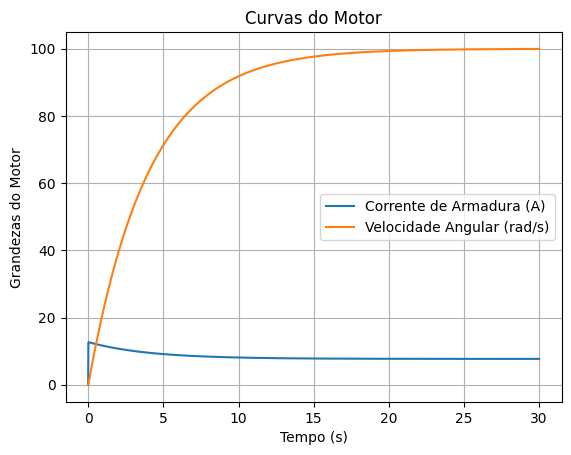

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Parâmetros do motor
L_a = 5.2e-3
R_a = 2
J_eq = 0.02
V_a = 30
kE = 0.1
kT = 0.1
T_L = np.random.rand()*10








#Parâmetros da simulação
omega_m_ref = 100
K1 = 1/kE
K2 = R_a/(kE**2)
V_a_ref = (1/K1)*( omega_m_ref + K2*T_L )

dt = 1e-4
t = np.arange(0,30,dt)

N = len(t)
i_a = np.zeros(N)
omega = np.zeros(N)
E_a = np.zeros(N)

i_a[0] = 0
omega[0] = 0
E_a[0] = 0



for i in range(N-1):
  i_a[i+1] = i_a[i] + (dt/L_a)*(V_a_ref - R_a*i_a[i] - kE*omega[i])
  omega[i+1] = omega[i] + (dt/J_eq)*(kT*i_a[i] - T_L)
  E_a[i+1] = kE*omega[i]



plt.plot(t,i_a, label='Corrente de Armadura (A)') # Adicionando labels para a legenda
plt.plot(t,omega, label='Velocidade Angular (rad/s)') # Adicionando labels para a legenda
plt.xlabel('Tempo (s)')
plt.ylabel('Grandezas do Motor')
plt.title('Curvas do Motor')
plt.legend() # Adicionando legenda
plt.grid(True) # Adicionando grid para melhor visualização
plt.show()

##**Controle de Velocidade em Regime Transitório**
Para controlar o motor em regime transitório, precisamos levar em consideração as derivadas, então temos mais uma vez as equações diferenciais

$$
\begin{cases}
v_a(t) = R_a i_a(t) + L_a \frac{d}{dt}i_a(t) +  E_a(t)
 \\
\frac{d}{dt} \omega(t) = \frac{1}{J_{eq}} ( \tau_{em}(t) - \tau_L ) \\
E_a(t) = k_E \omega(t)\\
\tau_{em}(t) = k_T i_a(t)
\end{cases}
$$



###**Controle de Corrente do Motor CC**
se queremos controlar a corrente do motor CC, podemos então fazer um laço de realimentação com um subtrator entre a corrente de referência e a corrente medida, afim de minimizar o erro entre elas, passar por um controlador proporcional integrativo, e colocar isso na entrada da planta elétrica como sendo uma tensão controlada.

Para

$$
\begin{cases}
s J_{eq} \Omega_m (s) = T_{em}(s) - T_L(s) \\
V_a(s) - E_a(s)  = (R_a + s L_a) I_a(s) \\
E_a(s) = k_E \Omega_m(s) \\
T_{em}(s) = k_T I_a(s)
\end{cases}
$$

Temos então

$$
\begin{cases}
e(t) = I_a^* - i_a(t) \\
e_p(t) = k_p \cdot e(t) + k_i \int_{0}^{t} e(\tau) d\tau \\
v_a(t) = k_{pwm} e_p(t) \\
\end{cases}
$$


em laplace, jutando todas essas equações, temos:


$$
\begin{cases}
s J_{eq} \Omega_m (s) = T_{em}(s) - T_L(s) \\
V_a(s) - E_a(s)  = (R_a + s L_a) I_a(s) \\
E_a(s) = k_E \Omega_m(s) \\
T_{em}(s) = k_T I_a(s) \\
e(s) = I_a^* - I_a(s) \\
e_p(s) = (k_p + \frac{k_i}{s} )e(s) \\
V_a(s) = k_{pwm} e_p(s) \\
\end{cases}
$$


A modelagem do sistema no domínio de Laplace é dada pelo seguinte conjunto de equações:

$$
\begin{cases}
    V_a(s) - E_a(s) = (R_a+sL_a)I_a(s) \\
    E_a(s) = k_E\Omega_m(s) \\
    \Omega_m(s) = \frac{1}{J_{eq} s}T_{em}(s) \\
    T_{em}(s) = k_T I_a(s)
\end{cases}
$$

A partir delas, pode-se derivar a relação entre a força eletromotriz induzida e a corrente de armadura, mediada pela dinâmica mecânica:

$$E_a(s) = \frac{k_E k_T}{sJ_{eq}} I_a(s)$$

Para o projeto de um controlador de corrente em malha fechada, a função de transferência é dada por:

$$G_{I,mf}(s) = \frac{G_I(s)}{1 + G_I(s)}$$

Onde a função de transferência de malha aberta, já com o controlador PI, é:

$$G_I(s) = \left(k_{pI} + \frac{k_{iI}}{s}\right) \cdot \frac{1/L_a}{s + R_a/L_a} = \frac{s k_{pI} + k_{iI}}{sL_a(s+R_a/L_a)}$$

Substituindo e simplificando a função de transferência de malha fechada, obtemos:

$$G_{I,mf}(s) = \frac{\frac{s k_{pI} + k_{iI}}{sL_a(s+R_a/L_a)}}{1 + \frac{s k_{pI} + k_{iI}}{sL_a(s+R_a/L_a)}} = \frac{sk_{pI}/L_a+k_{iI}/L_a}{s(s+R_a/L_a) + sk_{pI}/L_a + k_{iI}/L_a}$$

Isso resulta na forma final:

$$G_{I,mf}(s) = \frac{sk_{pI}/L_a+k_{iI}/L_a}{s^2 +s(R_a/L_a +k_{pI}/L_a) + k_{iI}/L_a}$$

Para a síntese do controlador, igualamos o denominador ao polinômio característico de um sistema de segunda ordem padrão:

$$s^2 + 2\xi \omega_ns + \omega_n^2 = s^2 +s(R_a/L_a +k_{pI}/L_a) + k_{iI}/L_a$$

O que nos permite encontrar os ganhos do controlador em função dos parâmetros de desempenho desejados ($\xi$ e $\omega_n$) e dos parâmetros do motor:

$$
\begin{cases}
    k_{pI} = 2 \xi \omega_n L_a - R_a\\
    k_{iI} = \omega_n^2 L_a
\end{cases}
$$


e as grandezes $\omega_n$ e $\xi$ podem ser obtidas por especificações de projeto, por exemplo.


**Questão 1**
Projete um controlador PI para controlar a corrente em um motor CC de modo que que corrente que entra no motor seja de $I_a = 10 \ A$.

Para projetar o controlador de corrente, será utilizada as equações 1.32, que se referem a achar os parâmetros do controlador a partir das informações do sistema de segunda ordem. Primeiro, precisamos antes calcular a constante de tempo da planta elétrica, para então saber quando será o regime permanente.

$$\tau_e = L_a/R_a = 0.01\ H / 0.65\ \Omega = 0.015s$$

As equações de projeto de um sistema de segunda ordem são:

$$
\begin{cases}
M_p = e^{\frac{-\xi \pi}{\sqrt{1 - \xi^2}}} \\
T_{ss} \approx \frac{4}{\xi \omega_n}
\end{cases}
$$

Isolando o $\xi$ na equação do overshoot, temos:

$$ln^2(M_p) = \frac{\xi^2 \pi^2}{{1 - \xi^2}} $$

E colocando tudo de um lado só:

$$ln^2(M_p) - \xi^2 ln^2(M_p) = \xi^2 \pi^2$$

Então, a expressão para o fator de amortecimento $\xi$ é:

$$\xi = \frac{-ln(M_p)}{\sqrt{\pi^2 + ln^2(M_p)}} $$

E a frequência natural é dada por:

$$\omega_n = \frac{4}{\xi T_{ss}}$$

considerando um overshoot de $5%$, e um $T_{ss} = 10\tau_e$

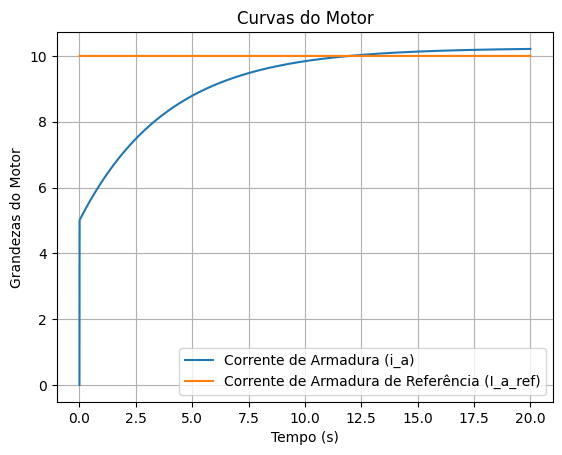

In [84]:
import numpy as np
import matplotlib.pyplot as plt



#Parâmetros do motor
L_a = 5.2e-3
R_a = 2
J_eq = 0.4
V_a = 30
kE = 0.1
kT = 0.1
T_L = 2


#Controle de corrente do motor cc
k_pwm = 1
tau_e = L_a/R_a



#Especificações de Projeto
Mp = 0.05#
T_ss = 4*tau_e
pi = np.pi

ksi = -np.log(Mp)/(np.sqrt(pi**2 + np.log(Mp)**2))
wn = 4/(ksi*T_ss)

k_pi = 2*ksi*wn*L_a - R_a
k_ii = wn**2*L_a


I_a_ref = 10



#Parâmetros da simulação
dt = 1e-4
t = np.arange(0,20,dt)

N = len(t)
i_a = np.zeros(N)
omega = np.zeros(N)
E_a = np.zeros(N)

i_a[0] = 0
omega[0] = 0
E_a[0] = 0
e = np.zeros(N)


for i in range(N-1):
  e[i] = I_a_ref - i_a[i]
  V_a = k_pwm*(k_pi*e[i] + np.sum(e[0:i]*dt))
  i_a[i+1] = i_a[i] + (dt/L_a)*(V_a - R_a*i_a[i] - E_a[i])
  omega[i+1] = omega[i] + (dt/J_eq)*(kT*i_a[i] - T_L)
  E_a[i+1] = kE*omega[i]



plt.plot(t,i_a, label='Corrente de Armadura (i_a)') # Adicionando labels para a legenda
plt.plot(t,I_a_ref*np.ones(N), label='Corrente de Armadura de Referência (I_a_ref)') # Adicionando labels para a legenda
plt.xlabel('Tempo (s)')
plt.ylabel('Grandezas do Motor')
plt.title('Curvas do Motor')
plt.legend() # Adicionando legenda
plt.grid(True) # Adicionando grid para melhor visualização
plt.show()

##**Controle de Corrente Utilizando PWM**
Para melhorar o controle de corrente, podemos utilizar uma modulação por largura de pulso para a tensão de armadura, que é controlada pelo duty cicle que vem da comparação entre uma onda triangular e a tensão de referência que tem como entrada sua corrente.

temos então que

$$
V_a(t) = D(t) \cdot E
$$

onde E é a tensão do barramento CC que alimenta a ponte H.

e o duty cicle $D(t)$ é variante no tempo porque ele que é ajustado com o controle, e é determinado como

$$
D(t) = \frac{e_p(t)}{V_{tri}}
$$

a onda triangular não simétrica tem a forma de uma rampa de inclinação $a$, de $k T_s \leq t \leq (k+1)T_s$, ou seja, podemos calcular sua série de fourier como sendo

$$
b_n = \int_{0}^{T_s} f(t) sen(n\omega t)dt = \int_{0}^{T_s} a\cdot t \cdot sen(n\omega t)dt
$$

podemos usar integral por partes e obter

$$
b_n =  
$$


Porém podemos gerar essa onda triangular com a operação de resto da divisão, assim

$$
v_{tri}(t) = \frac{1}{T_s} \hat{v}_{tri} \cdot t \% T_s
$$

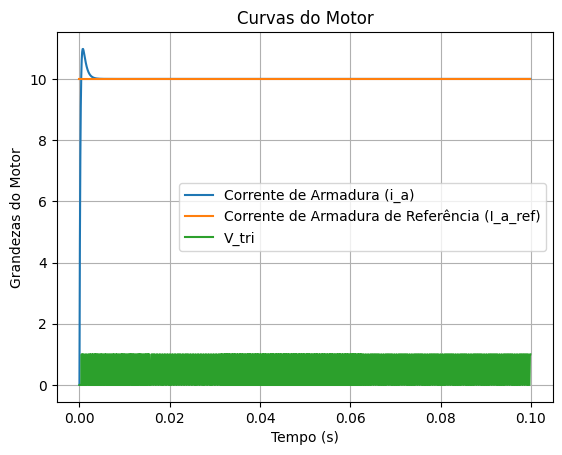

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def comparador(v_ref,v_tri):
  if v_ref > v_tri:
    return 1
  else:
    return 0


#Parâmetros do motor
L_a = 5.2e-3
R_a = 2
J_eq = 0.4
V_a = 30
kE = 0.1
kT = 0.1
T_L = 2


#Barramento CC
E = 12

#Controle de corrente do motor cc
k_pwm = 1
tau_e = L_a/R_a


f_s = 10000
T_s = 1/f_s


#Especificações de Projeto
Mp = 0.1#
T_ss = 4*tau_e
pi = np.pi

ksi = -np.log(Mp)/(np.sqrt(pi**2 + np.log(Mp)**2))
wn = 4/(ksi*T_ss)

k_pi = 2*ksi*wn*L_a - R_a
k_ii = wn**2*L_a


I_a_ref = 10



#Parâmetros da simulação
dt = 1e-4
t = np.arange(0,0.1,dt)

N = len(t)

v_tri = np.zeros(N)
a = 1/T_s

for i in range(N):
  v_tri[i] = a*(t[i]%T_s)


i_a = np.zeros(N)
omega = np.zeros(N)
E_a = np.zeros(N)

i_a[0] = 0
omega[0] = 0
E_a[0] = 0
e = np.zeros(N)


for i in range(N-1):
  e[i] = I_a_ref - i_a[i]
  e_p = k_pwm*(k_pi*e[i] + k_ii*np.sum(e[0:i]*dt))
  D = e_p
  V_a = D*E
  i_a[i+1] = i_a[i] + (dt/L_a)*(V_a - R_a*i_a[i] - E_a[i])
  omega[i+1] = omega[i] + (dt/J_eq)*(kT*i_a[i] - T_L)
  E_a[i+1] = kE*omega[i]



plt.plot(t,i_a, label='Corrente de Armadura (i_a)') # Adicionando labels para a legenda
plt.plot(t,I_a_ref*np.ones(N), label='Corrente de Armadura de Referência (I_a_ref)') # Adicionando labels para a legenda
plt.plot(t,v_tri, label='V_tri') # Adicionando labels para a legenda
plt.xlabel('Tempo (s)')
plt.ylabel('Grandezas do Motor')
plt.title('Curvas do Motor')
plt.legend() # Adicionando legenda
plt.grid(True) # Adicionando grid para melhor visualização
plt.show()

##**Controle de Velocidade do Motor CC**
O controle mais importante do motor é o de sua velocidade, que precisa permanecer no nível desejado, em regime permanente e independente de cargas que são adicionadas a ele.

Para a malha de velocidade, temos as seguintes equações:

$$
\begin{cases}
    s J_{eq}\Omega_m(s) = T_{em}(s)\\
    E_a(s) = k_E \Omega_m(s) \\
    T_{em}(s) = k_T I_a(s)\\
    I_a(s) = \frac{1/L_a}{s + \frac{R_a}{L_a}} E_a(s)
\end{cases}
$$

Podemos então imaginar a malha da velocidade em função do torque e da corrente como:

$$
H_{\Omega}(s) = \frac{\Omega_m(s)}{I_a(s)} = \frac{k_T}{J_{eq}s}
$$

E colocando um controlador PI também para determinar um sistema de segunda ordem com certos parâmetros.

A função de transferência de malha aberta levando em consideração o torque é:

$$
\frac{\Omega_m(s)}{T_{em}(s)} = G_{\Omega}(s) = \frac{1}{J_{eq}s}
$$

Controlar a velocidade angular pelo torque é igual a controlar a velocidade angular pela corrente, então no diagrama de blocos do motor, o controlador PI da velocidade vem logo depois do controlador PI de corrente. Para então analisarmos o controlador de velocidade, primeiro calculamos a função de transferência de malha fechada da malha de velocidade acoplada com o controlador PI, assim temos:

$$
G_{\Omega}(s) = \left(k_{p\Omega} + \frac{k_{i\Omega}}{s}\right) \cdot \frac{1}{J_{eq}s}
$$

Assim a função de transferência de malha fechada é dada por:

$$
G_{\Omega, mf}(s) = \frac{ \left(k_{p\Omega} + \frac{k_{i\Omega}}{s} \right) \cdot \frac{1}{J_{eq}s} }{1 + \left(k_{p\Omega} + \frac{k_{i\Omega}}{s} \right) \cdot \frac{1}{J_{eq}s} }
$$

Por fim temos:

$$
G_{\Omega, mf}(s) = \frac{k_{p \Omega}s/J_{eq} + k_{i\Omega}/J_{eq}}{ s^2 + k_{p\Omega}s/J_{eq} + k_{i\Omega}/J_{eq}}
$$

Podemos comparar mais uma vez o polinômio característico dessa função de transferência com um polinômio característico padrão de segunda ordem, tendo as igualdades:

$$
\begin{cases}
    \frac{k_{p\Omega}}{J_{eq}} = 2 \xi \omega_n \\
    \frac{k_{i\Omega}}{J_{eq}} = \omega_n^2
\end{cases}
$$

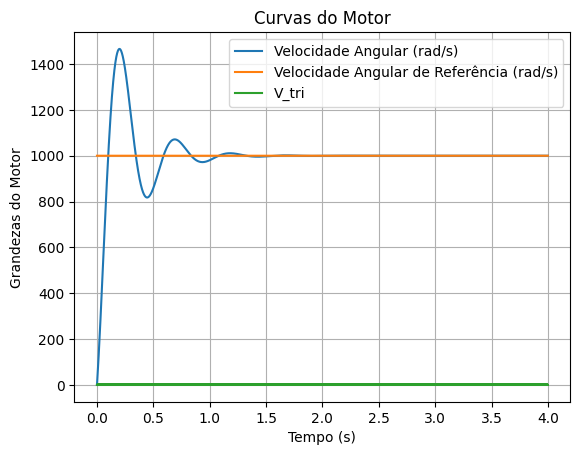

In [87]:
import numpy as np
import matplotlib.pyplot as plt


def comparador(v_ref,v_tri):
  if v_ref > v_tri:
    return 1
  else:
    return 0


#Parâmetros do motor
L_a = 5.2e-3
R_a = 2
J_eq = 0.4
V_a = 30
kE = 0.1
kT = 0.1
T_L = 2


#Barramento CC
E = 12

#Controle de corrente do motor cc
k_pwm = 1
tau_e = L_a/R_a


f_s = 10000
T_s = 1/f_s


#Especificações de Projeto do Controlador de Corrente
Mp = 0.001
T_ss = 4*tau_e
pi = np.pi

ksi = -np.log(Mp)/(np.sqrt(pi**2 + np.log(Mp)**2))
wn = 4/(ksi*T_ss)

k_pi = 2*ksi*wn*L_a - R_a
k_ii = wn**2*L_a


#Especificações de Projeto do Controlador de Velocidade
#Tss_v = 10Tss_I
wn_w = 4/(ksi*10*T_ss)

k_pw = J_eq*2*ksi*wn_w
k_iw =  J_eq*wn_w**2

omega_m_ref = 1000



#Parâmetros da simulação
dt = 1e-4
t = np.arange(0,4,dt)

N = len(t)

v_tri = np.zeros(N)
a = 1/T_s

for i in range(N):
  v_tri[i] = a*(t[i]%T_s)


i_a = np.zeros(N)
omega = np.zeros(N)
E_a = np.zeros(N)

i_a[0] = 0
omega[0] = 0
E_a[0] = 0
e_w = np.zeros(N)
e = np.zeros(N)


for i in range(N-1):
  #Malha Externa
  e_w[i] = omega_m_ref - omega[i]
  I = k_pwm*(k_pw*e_w[i] + k_iw*np.sum(e_w[0:i]*dt))

  #Malha interna
  e[i] = I - i_a[i]
  e_p = k_pwm*(k_pi*e[i] + k_ii*np.sum(e[0:i]*dt))

  D = e_p
  V_a = D*E
  i_a[i+1] = i_a[i] + (dt/L_a)*(V_a - R_a*i_a[i] - E_a[i])
  omega[i+1] = omega[i] + (dt/J_eq)*(kT*i_a[i] - T_L)
  E_a[i+1] = kE*omega[i]



plt.plot(t,omega, label='Velocidade Angular (rad/s)') # Adicionando labels para a legenda
plt.plot(t,omega_m_ref*np.ones(N), label='Velocidade Angular de Referência (rad/s)') # Adicionando labels para a legenda
plt.plot(t,v_tri, label='V_tri') # Adicionando labels para a legenda
plt.xlabel('Tempo (s)')
plt.ylabel('Grandezas do Motor')
plt.title('Curvas do Motor')
plt.legend() # Adicionando legenda
plt.grid(True) # Adicionando grid para melhor visualização
plt.show()

##**Melhorando o Controle de Velocidade**
Porém, podemos ainda melhorar o controle de velocidade, utilizando uma partida em rampa para a referência. Assim, a velocidade seguirá de maneira mais suave a referência, conseguindo ajustar melhor a curva.

Para a partida em rampa, utilizamos um sinal que segue em formato de rampa do valor inicial até o valor de referência em um tempo $T_p$, ficando constante desse ponto até o fim da simulação.

Essa curva de referência tem a seguinte equação:

$$p_c(t) = a(\rho(t) - \rho(t - T_p)) =\frac{ \omega_{ref}^*}{T_p} \cdot (\rho(t) - \rho(t - T_p) ) $$

Onde $\rho(t)$ é o sinal rampa, dado por:

$$
\rho(t) = \begin{cases}
    t \ , \text{se } t \geq 0 \\
    0 \ , \text{se } t<0
\end{cases}
$$

Podemos ainda calcular o $T_p$ ótimo de acordo com os parâmetros mecânicos do motor, utilizando a equação da segunda lei de Newton para o movimento rotacional, dada por:

$$J_{eq} \frac{d}{dt}\omega_m = T_{em} - T_L$$

Assumindo que a derivada é justamente a inclinação da rampa que queremos, temos:

$$J_{eq} \frac{\omega_m^*}{T_p} = T_{em} - T_L$$

Assim, o tempo $T_p$ é dado por:

$$T_p = \frac{J_{eq} \omega_m^*}{T_{em} - T_L} $$

1.666666666666667


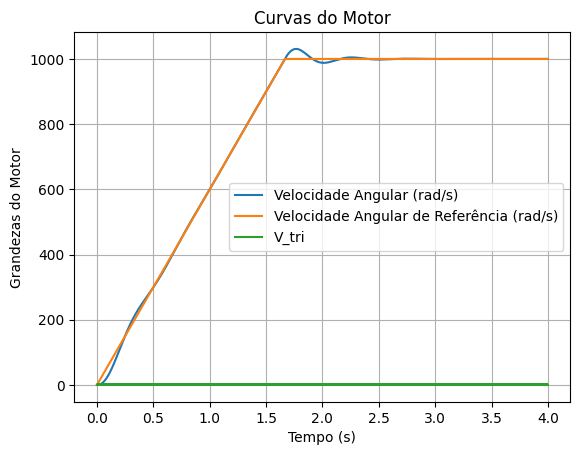

In [94]:
import numpy as np
import matplotlib.pyplot as plt


def comparador(v_ref,v_tri):
  if v_ref > v_tri:
    return 1
  else:
    return 0


#Parâmetros do motor
L_a = 5.2e-3
R_a = 2
J_eq = 0.4
V_a = 30
kE = 0.1
kT = 0.1
T_L = 2


#Barramento CC
E = 12

#Controle de corrente do motor cc
k_pwm = 1
tau_e = L_a/R_a


f_s = 10000
T_s = 1/f_s


#Especificações de Projeto do Controlador de Corrente
Mp = 0.001
T_ss = 4*tau_e
pi = np.pi

ksi = -np.log(Mp)/(np.sqrt(pi**2 + np.log(Mp)**2))
wn = 4/(ksi*T_ss)

k_pi = 2*ksi*wn*L_a - R_a
k_ii = wn**2*L_a


#Especificações de Projeto do Controlador de Velocidade
#Tss_v = 10Tss_I
wn_w = 4/(ksi*10*T_ss)

k_pw = J_eq*2*ksi*wn_w
k_iw =  J_eq*wn_w**2

omega_m_ref = 1000


def degrau(t):
  return np.where(t >= 0, 1, 0)

def rampa(t):
  return t*degrau(t)


T_p = np.abs((J_eq*omega_m_ref)/(kT*8 - T_L))/200
print(T_p)
omega_m_rampa = (omega_m_ref/T_p) * (rampa(t) - rampa(t - T_p))


#Parâmetros da simulação
dt = 1e-4
t = np.arange(0,4,dt)

N = len(t)

v_tri = np.zeros(N)
a = 1/T_s

for i in range(N):
  v_tri[i] = a*(t[i]%T_s)


i_a = np.zeros(N)
omega = np.zeros(N)
E_a = np.zeros(N)

i_a[0] = 0
omega[0] = 0
E_a[0] = 0
e_w = np.zeros(N)
e = np.zeros(N)


for i in range(N-1):
  #Malha Externa
  e_w[i] = omega_m_rampa[i] - omega[i]
  I = k_pwm*(k_pw*e_w[i] + k_iw*np.sum(e_w[0:i]*dt))

  #Malha interna
  e[i] = I - i_a[i]
  e_p = k_pwm*(k_pi*e[i] + k_ii*np.sum(e[0:i]*dt))

  D = e_p
  V_a = D*E
  i_a[i+1] = i_a[i] + (dt/L_a)*(V_a - R_a*i_a[i] - E_a[i])
  omega[i+1] = omega[i] + (dt/J_eq)*(kT*i_a[i] - T_L)
  E_a[i+1] = kE*omega[i]



plt.plot(t,omega, label='Velocidade Angular (rad/s)') # Adicionando labels para a legenda
plt.plot(t,omega_m_rampa, label='Velocidade Angular de Referência (rad/s)') # Adicionando labels para a legenda
plt.plot(t,v_tri, label='V_tri') # Adicionando labels para a legenda
plt.xlabel('Tempo (s)')
plt.ylabel('Grandezas do Motor')
plt.title('Curvas do Motor')
plt.legend() # Adicionando legenda
plt.grid(True) # Adicionando grid para melhor visualização
plt.show()